In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
import numpy as np
from networkx.algorithms import cuts
import pandas as pd

In [ ]:
# Load karate graph
G = nx.karate_club_graph()

In [ ]:
# Girvan-Newman
girvan_newman_generator = community.girvan_newman(G)
# best_modularity = -1
# best_partition = None
# while True:
#     try:
#         current_partition = next(girvan_newman_generator)
#         current_modularity = community.modularity(G, current_partition)
#         if current_modularity > best_modularity:
#             best_modularity = current_modularity
#             best_partition = current_partition
#     except StopIteration:
#         break
# girvan_newman_partition = best_partition
girvan_newman_partition = max(girvan_newman_generator, key=lambda partition: community.modularity(G, partition))

In [ ]:
# Label Propagation
label_propagation_partition = community.label_propagation_communities(G)

In [ ]:
# Detect communities using different methods
# Louvain (using alternative)
louvain_partition = list(community.louvain_communities(G))

In [ ]:
# Add function to calculate metrics
def calculate_metrics(G, communities):
    metrics = {
        'num_communities': len(communities),
        'modularity': community.modularity(G, communities),
        'conductance': np.mean([cuts.conductance(G, c) for c in communities]),
        'normalized_cut': np.mean([cuts.normalized_cut_size(G, c) for c in communities])
    }
    return metrics

In [ ]:
def create_community_node_colors(graph, communities):
    node_colors = []
    for node in graph:
        for idx, comm in enumerate(communities):
            if node in comm:
                node_colors.append(plt.cm.jet(idx / len(communities)))
                break
    return node_colors

def visualize_communities(graph, communities, title, ax):
    node_colors = create_community_node_colors(graph, communities)
    pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=2)
    modularity = community.modularity(graph, communities)

    ax.set_title(f"{title}\n{len(communities)} communities (Modularity: {modularity:.3f})")
    nx.draw(graph, pos=pos, node_size=500, node_color=node_colors,
            with_labels=True, font_size=10, ax=ax)

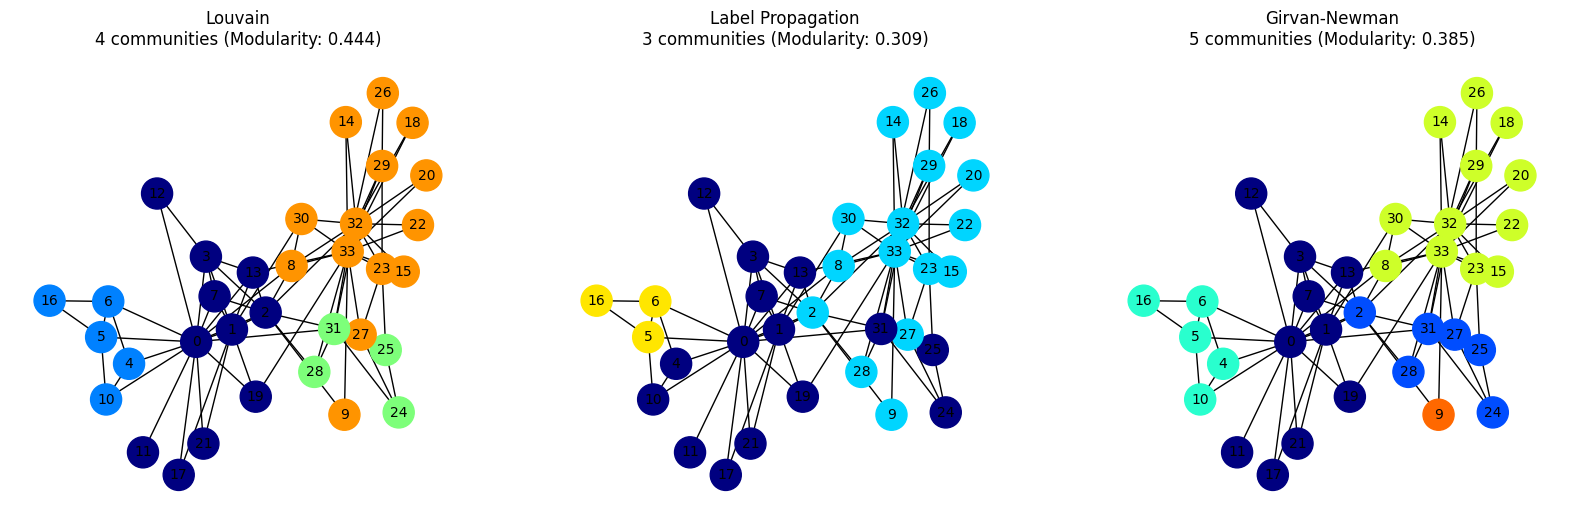

In [ ]:
# Plot communities
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

visualize_communities(G, louvain_partition, "Louvain", axes[0])
visualize_communities(G, label_propagation_partition, "Label Propagation", axes[1])
visualize_communities(G, girvan_newman_partition, "Girvan-Newman", axes[2])

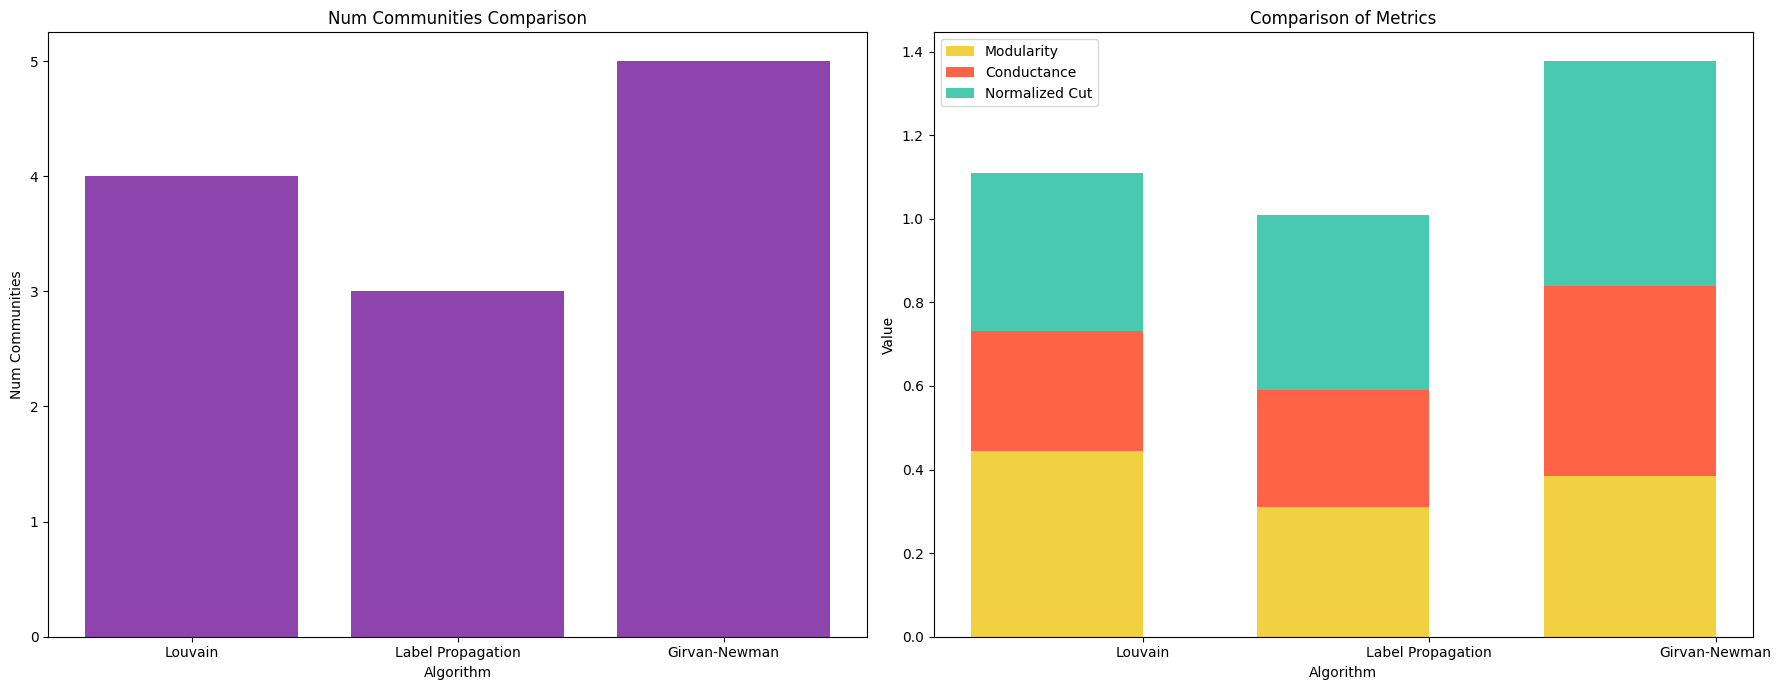

In [ ]:
# Create DataFrame for metrics comparison
metrics_data = []
algorithms = ["Louvain", "Label Propagation", "Girvan-Newman"]

for partition, algorithm in zip([louvain_partition, label_propagation_partition, girvan_newman_partition], algorithms):
    metrics = calculate_metrics(G, partition)
    metrics_data.append({
        'Algorithm': algorithm,
        'Num Communities': metrics['num_communities'],
        'Modularity': metrics['modularity'],
        'Conductance': metrics['conductance'],
        'Normalized Cut': metrics['normalized_cut']
    })

metrics_df = pd.DataFrame(metrics_data)

# Plot the comparison of metrics
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Bar chart for comparing 'Num Communities' between algorithms
axes[0].bar(metrics_df['Algorithm'], metrics_df['Num Communities'], color="#8E44AD")
axes[0].set_title("Num Communities Comparison")
axes[0].set_xlabel("Algorithm")
axes[0].set_ylabel("Num Communities")

# Bar chart for comparing Modularity, Conductance, and Normalized Cut for each algorithm
bar_width = 0.6  # Increase the width of the bars
x = np.arange(len(metrics_df['Algorithm']))  # X positions for each algorithm

axes[1].bar(x - bar_width/2, metrics_df['Modularity'], width=bar_width, label='Modularity', color="#F2D140")
axes[1].bar(x - bar_width/2, metrics_df['Conductance'], width=bar_width, label='Conductance', color="#FF6347", bottom=metrics_df['Modularity'])
axes[1].bar(x - bar_width/2, metrics_df['Normalized Cut'], width=bar_width, label='Normalized Cut', color="#48C9B0", bottom=metrics_df['Modularity'] + metrics_df['Conductance'])

axes[1].set_title("Comparison of Metrics")
axes[1].set_xlabel("Algorithm")
axes[1].set_ylabel("Value")
axes[1].set_xticks(x)
axes[1].set_xticklabels(metrics_df['Algorithm'])
axes[1].legend()

plt.tight_layout()
plt.show()

# YÊU CẦU
Viết lại bài Lab03.02 thành class, xây dựng pipeline áp dụng cho đồ thị mạng xã hội bất kỳ.
Giới thiệu tổng quan về thuật toán louvain
Tóm tắt tổng quan các chỉ số đánh giá việc phát hiện cộng đồng (công thức, phạm vi, như thế nào là tốt, .... )
Thực hiện phân tích việc (nhận xét) phát hiện cộng đồng cho mạng xã hội tự chọn
